# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### Proyecto Integrador (Gpo 10) - TC5035.10

### **Proyecto: Diseño Acelerado de Fármacos**

### Avance 3: Baseline

#### **Docentes:**
- Dra. Grettel Barceló Alonso - Profesor Titular
- Dr. Luis Eduardo Falcón Morales - Profesor Titular
- Dr. Horacio Martinez Alfaro  – Profesor Tutor

#### **Miembros del equipo:**
 - Jose Luis Artigas Arroyo - A01794906
 - José Luis Fabela Portillo - A00748551
 - Alejandro Emmanuel Silva Ortega - A01794545

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

In [2]:
X = pd.read_csv('./data/processed/pca_pfeatures.csv')
y = pd.read_csv('./data/processed/VEGF_y.csv')

In [3]:

print(X.shape)
print(y.shape)

(2704, 20)
(2704, 1)


# Separar datasets en train y test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)

# Comparar modelos usando lazypredict

In [5]:
# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)

100%|██████████| 31/31 [00:04<00:00,  7.43it/s]

[LightGBM] [Info] Number of positive: 14, number of negative: 2149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 2163, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.006472 -> initscore=-5.033701
[LightGBM] [Info] Start training from score -5.033701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [6]:
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,1.00,0.48
ExtraTreesClassifier,1.00,1.00,1.00,1.00,1.00,0.15
XGBClassifier,1.00,1.00,1.00,1.00,1.00,0.34
RandomForestClassifier,1.00,1.00,1.00,1.00,1.00,0.35
QuadraticDiscriminantAnalysis,1.00,1.00,1.00,1.00,1.00,0.05
LabelSpreading,1.00,1.00,1.00,1.00,1.00,0.56
LabelPropagation,1.00,1.00,1.00,1.00,1.00,0.56
LGBMClassifier,1.00,1.00,1.00,1.00,1.00,0.16
ExtraTreeClassifier,1.00,1.00,1.00,1.00,1.00,0.02


In [8]:
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 31/31 [00:02<00:00, 10.94it/s]

[LightGBM] [Info] Number of positive: 14, number of negative: 2149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 2163, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.006472 -> initscore=-5.033701
[LightGBM] [Info] Start training from score -5.033701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [9]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
LGBMClassifier,1.00,0.88,0.88,1.00,0.87,0.13
XGBClassifier,1.00,0.88,0.88,1.00,0.87,0.09
SVC,1.00,0.88,0.88,1.00,0.87,0.03
ExtraTreesClassifier,1.00,0.88,0.88,1.00,0.87,0.15
GaussianNB,1.00,0.88,0.88,1.00,0.87,0.02
KNeighborsClassifier,1.00,0.88,0.88,1.00,0.87,0.07
LabelSpreading,1.00,0.87,0.87,1.00,0.75,0.39
Perceptron,1.00,0.87,0.87,1.00,0.75,0.03
PassiveAggressiveClassifier,1.00,0.87,0.87,1.00,0.75,0.03


In [10]:
y_test

,label
1832,0
1767,0
702,0
1141,0
2467,0
...,...
284,0
795,0
1136,0
1238,0


[(0.0, 1.0)]

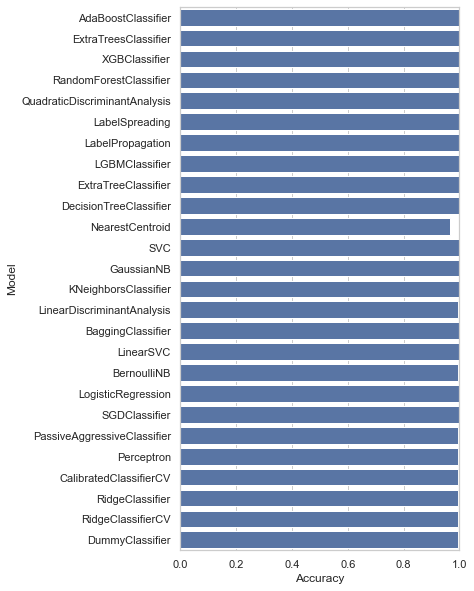

In [11]:
# Plot of Accuracy
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="Accuracy", data=models_train)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

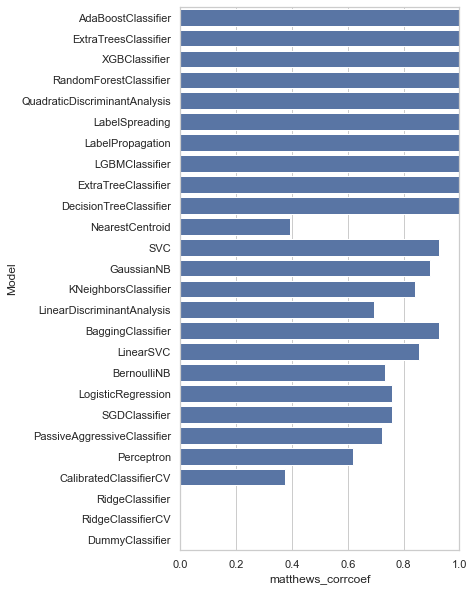

In [12]:
# Plot of MCC
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="matthews_corrcoef", data=models_train)
ax.set(xlim=(0, 1))

In [13]:
# Build random forest model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [14]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [15]:
rf.score(X_test,y_test)

0.9944547134935305

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.9944547134935305

In [17]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_test_pred)

0.49860917672171967

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[537,   0],
       [  3,   1]], dtype=int64)

In [24]:
# Classification report
from sklearn.metrics import classification_report

model_report = classification_report(y_train, y_train_pred, target_names=['positive','negative'], output_dict= True)

f = open('model_report.txt','w')
f.writelines(model_report) 
f.close()

In [25]:
model_report

{'positive': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 2149.0},
 'negative': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 14.0},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 2163.0},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 2163.0}}

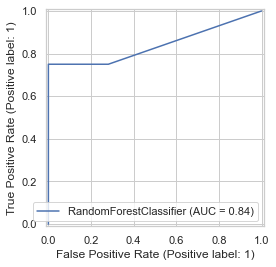

In [27]:
# ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(rf, X_test, y_test)  
plt.show()

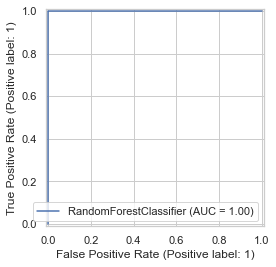

In [28]:
RocCurveDisplay.from_estimator(rf, X_train, y_train)  
plt.show()